# 05 - Kaggle - bike share system - data analysis


For problem formulation refer to **"01 - Kaggle - bike share system - problem formulation.ipynb"**.
In section **"02 - Kaggle - bike share system - Data preprocessing.ipynb"** we transformed the raw data and extracted time, date, and dummy matrices. The results are stored in two formats:
 * In `train_prep_orig.csv` and `test_prep_orig.csv` the categorical data are in the original form.
 * In `train_prep_dum.csv` and `test_prep_dum.csv` the categorical data are converted to dummy matrices. 

In section **03 - Kaggle - bike share system - data visualization.ipynb** we ploted the average of customers at different time periods over 2011 and 2012 and discused the pattern of customer behavior. We concluded by a decision to consider these average values as new features of the problem so that the machine learning model will be able to use them as the basis values and the other features apply the necessary correction to make the predictions closer to the actual values. In **04 - Kaggle - bike share system - Adding customer average to the features.ipynb** we added the average customers as new featres to the data sets. We finally, update the data sets as:
 * In `train_prep_orig_avg.csv` and `test_prep_orig_avg.csv` the categorical data are in the original form.
 * In `train_prep_dum_avg.csv` and `test_prep_dum_avg.csv` the categorical data are converted to dummy matrices. 
 
 In this section we visulaize and analyze the data. We use the data in `train_prep_orig_avg.csv`, which includes:



<center> temp|  atemp | humidity | windspeed | year | season | month | weekday | hour | workingday | holiday | weather | avg_casual | avg_registered | avg_tot | casual | registered | count
 </center>

- **temp**: temperature in Celsius. 

- **atemp**: "feels like" temperature in Celsius.

- **humidity**: relative humidity

- **windspeed**: wind speed

- **year**: 2011 or 2012

- **season**: Kaggle's [website](https://www.kaggle.com/c/bike-sharing-demand/data) says "`1 = spring, 2 = summer, 3 = fall, 4 = winter`", but the season indecies in the dataset correspond to 
    - 1 = Winter (January-March)
    - 2 = Spring (April-June)
    - 3 = Summer (July-September)
    - 4 = Fall (October-December)
    
- **month**: The month as January=1, December=12  

- **weekday**: The day of the week with Monday=0, Sunday=6

- **hour**: The hours of the datetime 0 - 23

- **workingday**: whether the day is neither a weekend nor holiday
     - 0 = day is weekend or holiday
     - 1 = otherwise 

- **holiday**: whether the day is considered a holiday 
    - 0 = non-holiday
    - 1 = holiday

- **weather**: encoded to make explicit various extreme weather events
    - 1 = Clear, Few clouds, Partly cloudy, Partly cloudy 
    - 2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)
    - 4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

- **casual**: number of non-registered user rentals initiated

- **registered**: number of registered user rentals initiated

- **tot**: number of total rentals (casual + registered)

- **avg_casual**: the average number of casual customers per weekday per month per year in a time period
- **avg_registered**:   the average number of registered customers per weekday per month per year in a time period
- **avg_tot**:  the average number of total customers per weekday per month per year in a time period





### Basic settings and importing the libraries

In [2]:
# Resets the namespace by removing all names defined by the user without asking for confirmation
%reset -f


# Panas is used for DataFrame
import pandas as pd

# NumPy is used for manipulating arrays
import numpy as np

# MatPlotLib is used for plotting
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# the output of plotting commands is displayed inline directly below the code cell that produced it.
%matplotlib inline

# Seaborn is used for statistical plotting
import seaborn as sns

# Used for display dataframes as html tables
from IPython.display import display

### Importing the train data from `train_prep_orig.csv`

In [3]:
#Load train data
data_train = pd.read_csv('data/train_prep_orig_avg.csv')

print "The shape of the train dataset:", data_train.shape
display(data_train.head())


The shape of the train dataset: (10886, 18)


,temp,atemp,humidity,windspeed,year,season,month,weekday,hour,workingday,holiday,weather,avg_casual,avg_registered,avg_tot,casual,registered,tot
0,9.84,14.395,81,0,2011,1,1,5,0,0,0,1,3,21.166667,24.166667,3,13,16
1,9.02,13.635,80,0,2011,1,1,5,1,0,0,1,3,21.166667,24.166667,8,32,40
2,9.02,13.635,80,0,2011,1,1,5,2,0,0,1,1,7.500000,8.500000,5,27,32
3,9.84,14.395,75,0,2011,1,1,5,3,0,0,1,1,7.500000,8.500000,3,10,13
4,9.84,14.395,75,0,2011,1,1,5,4,0,0,1,1,7.500000,8.500000,0,1,1


## Features and targets

In [4]:
cat_var = ['year','season', 'month', 'weekday', 'hour', 'workingday', 'holiday', 'weather']
num_var = ['temp', 'atemp', 'humidity', 'windspeed']
avg_var = ['avg_casual','avg_registered','avg_tot']
dev_var = ['dev_casual','dev_registered','dev_tot']
target_var = ['casual', 'registered', 'tot']


## Correlation between features

Here we have two main purpose for this analysis. One is to see the correlation between the features and tragets. The other one is the correlation between features themselves and whether we have to deal with multicollinearity.

Multicollinearity appears when there is a high correlation between two or more features. If the correlation is linear and perfect, the matrix $X^TX$ ($X$ is features matrix) is not invertible and we cannot use hat matrix for linear regression. But at a more deeper level, we are interested to know how a variation in a feature can change the value of the target. If two varables are colinear, we cannot conculde the relative importantce of these variables to the target variable, because the variables themselves are correlated. 


correlations


,casual,registered,tot
temp,0.467097,0.318571,0.394454
atemp,0.462067,0.314635,0.389784
humidity,-0.348187,-0.265458,-0.317371
windspeed,0.092276,0.091052,0.101369
year,0.145241,0.264265,0.260403
season,0.096758,0.164011,0.163439
month,0.092722,0.169451,0.166862
weekday,0.246959,-0.084427,-0.002283
hour,0.302045,0.380540,0.400601
workingday,-0.319111,0.119460,0.011594


/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


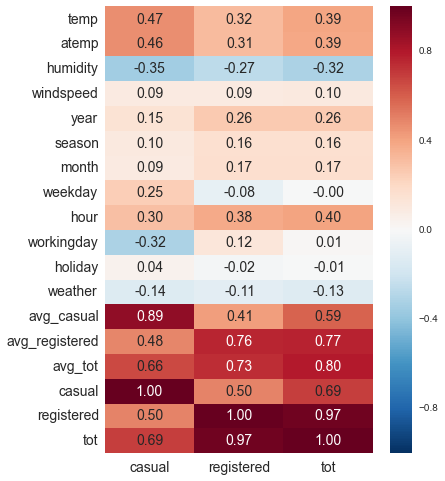

In [5]:
print "correlations"

display(data_train.corr().loc[:,['casual','registered','tot']])

plt.figure(num=None, figsize=(6, 8), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(data_train.corr().loc[:,['casual','registered','tot']],annot=True,fmt='.2f',annot_kws={"size": 14})
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

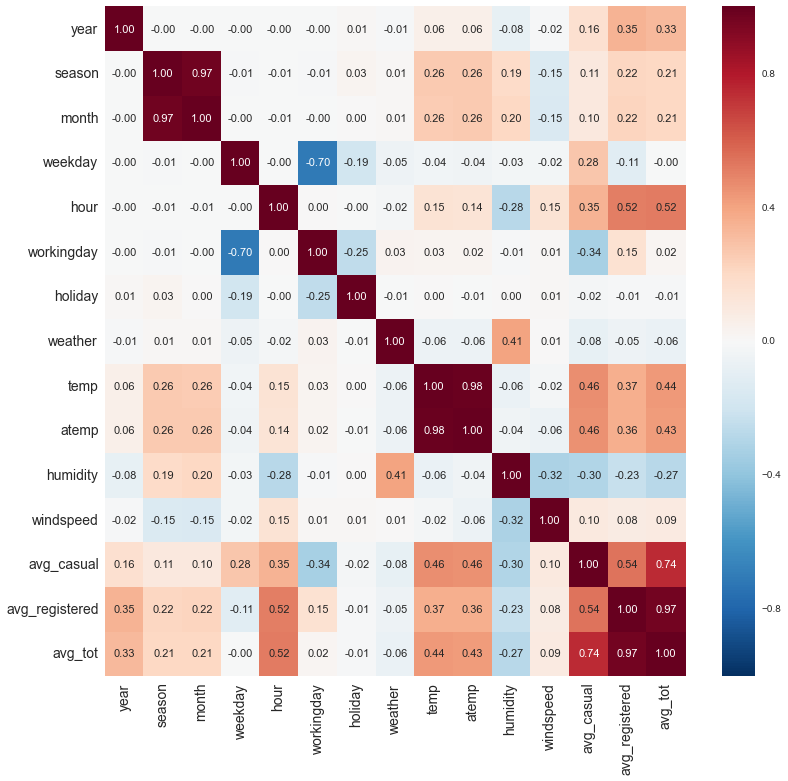

In [6]:
plt.figure(num=None, figsize=(13, 12), dpi=80, facecolor='w', edgecolor='k')

sns.heatmap(data_train[cat_var + num_var + avg_var].corr(),annot=True,fmt='.2f',annot_kws={"size": 11})

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

### note:

`temp` and `atemp` are highly correlated. So, are `month` and `season`. `workingday` and `weekday` show a relatively high correlation. We also see that the average customer features are highly correlted too. We will discuss about the latter later. 

Another method to calculate the multicollinearity is the determinant of the correlation matrix. If is it zero or close to zero, it is suggestive of multicollinearity. In a similar fashion, we can calculate the eigenvalues of the correlation matrix  and if the eienvalues are close to zero, it is suggestive of multicollinearity.

In [7]:
w, v = np.linalg.eig(data_train[cat_var + num_var + avg_var].corr())
print w    

print "\nsort arguments:", np.argsort(w)
print "\n Determinant of the correlation matrix: ", np.linalg.det(data_train[cat_var + num_var + avg_var].corr())

[  3.88621280e+00   2.26162350e+00   1.86174192e+00   1.32978630e+00
   1.21502811e+00   1.05876946e+00   1.11825626e+00   8.69957627e-01
   4.86529037e-01   4.44829376e-01   2.74406233e-01   1.51001943e-01
   2.78101543e-02   1.40472782e-02  -1.87032798e-15]

sort arguments: [14 13 12 11 10  9  8  7  5  6  4  3  2  1  0]

 Determinant of the correlation matrix:  -1.80429663092e-19


We see one nearly zero eigenvalue $-1.87\times10^{-15}$ and nearly zero determinant of the correlation matrix, which suggests multicollinearity. Let's do the same analysis without including the average customer features.


In [8]:
w, v = np.linalg.eig(data_train[cat_var + num_var].corr())
print w    

print "\nsort arguments:", np.argsort(w)
print "\n Determinant of the correlation matrix: ", np.linalg.det(data_train[cat_var + num_var].corr())

[ 2.55452119  1.87161444  1.71381881  1.23019289  1.11839774  1.06148223
  0.97680534  0.82112091  0.43439581  0.17564158  0.0140539   0.02795517]

sort arguments: [10 11  9  8  7  6  5  4  3  2  1  0]

 Determinant of the correlation matrix:  0.00028771333408


The detrminants is still very low, and we have multicollinearity, but it shows that using the average customer data as features brings problme to our system. Our goal was to use these average customer data as a basis from predictin and the other features apply the correction to the base value. So, we make new target vaaibales for customer that calculates their deviation from average. Then, we make machine learning models for these difference values whithout using average customer features. So, first let's make the customer deviation targets:

In [10]:

data_train['dev_casual'] = data_train['casual'] - data_train['avg_casual'] 
data_train['dev_registered'] = data_train['registered'] - data_train['avg_registered'] 
data_train['dev_tot'] = data_train['tot'] - data_train['avg_tot'] 

data_train.head()

,temp,atemp,humidity,windspeed,year,season,month,weekday,hour,workingday,...,weather,avg_casual,avg_registered,avg_tot,casual,registered,tot,dev_casual,dev_registered,dev_tot
0,9.84,14.395,81,0,2011,1,1,5,0,0,...,1,3,21.166667,24.166667,3,13,16,0,-8.166667,-8.166667
1,9.02,13.635,80,0,2011,1,1,5,1,0,...,1,3,21.166667,24.166667,8,32,40,5,10.833333,15.833333
2,9.02,13.635,80,0,2011,1,1,5,2,0,...,1,1,7.500000,8.500000,5,27,32,4,19.500000,23.500000
3,9.84,14.395,75,0,2011,1,1,5,3,0,...,1,1,7.500000,8.500000,3,10,13,2,2.500000,4.500000
4,9.84,14.395,75,0,2011,1,1,5,4,0,...,1,1,7.500000,8.500000,0,1,1,-1,-6.500000,-7.500000


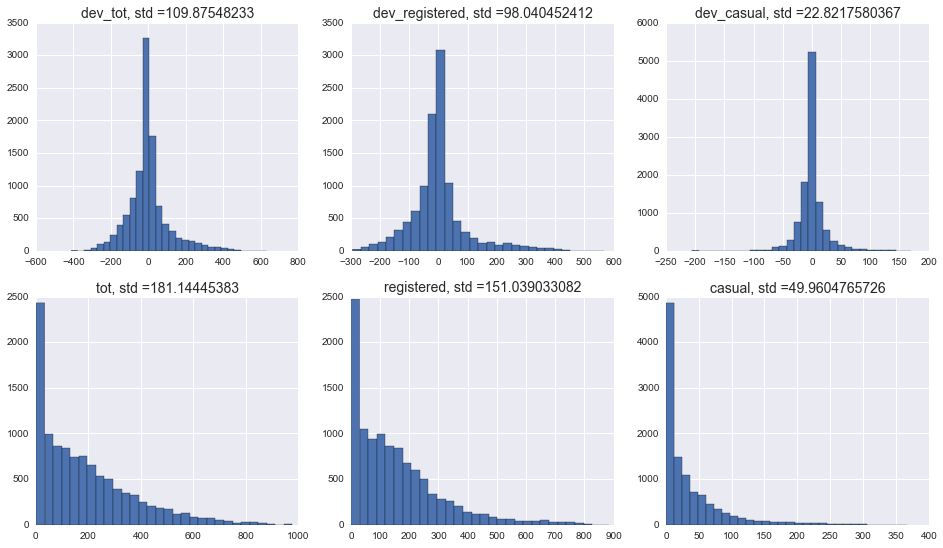

In [11]:
fig = plt.figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')

fig.add_subplot(231)
plt.hist(data_train['dev_tot'],bins = 30)
plt.title('dev_tot, std =' + str(data_train['dev_tot'].std()), size = 14)

fig.add_subplot(232)
plt.hist(data_train['dev_registered'],bins = 30)
plt.title('dev_registered, std =' + str(data_train['dev_registered'].std()), size = 14)

fig.add_subplot(233)
plt.hist(data_train['dev_casual'],bins = 30)
plt.title('dev_casual, std =' + str(data_train['dev_casual'].std()), size = 14)


fig.add_subplot(234)
plt.hist(data_train['tot'],bins = 30)
plt.title('tot, std =' + str(data_train['tot'].std()), size = 14)

fig.add_subplot(235)
plt.hist(data_train['registered'],bins = 30)
plt.title('registered, std =' + str(data_train['registered'].std()), size = 14)

fig.add_subplot(236)
plt.hist(data_train['casual'],bins = 30)
plt.title('casual, std =' + str(data_train['casual'].std()), size = 14)

plt.show()

Let's see the correlation between features and the targets

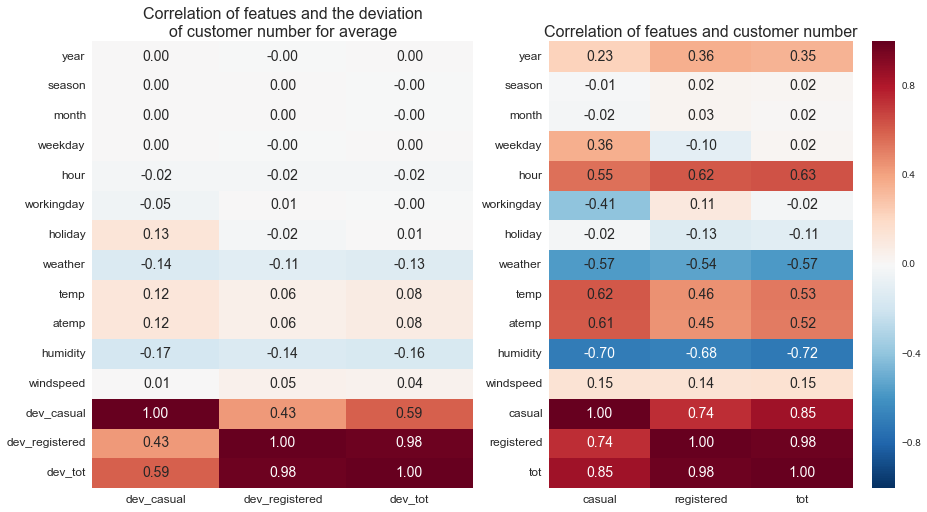

In [12]:
fig = plt.figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')

fig.add_subplot(121)
sns.heatmap(data_train[cat_var + num_var + dev_var].corr().loc[:, dev_var],
            annot=True,fmt='.2f',annot_kws={"size": 14}, cbar=False)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Correlation of featues and the deviation \nof customer number for average', fontsize = 16)

fig.add_subplot(122)
sns.heatmap(data_train[cat_var + num_var + target_var].corr().corr().loc[:, target_var],
            annot=True,fmt='.2f',annot_kws={"size": 14}, cbar=True)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Correlation of featues and customer number', fontsize = 16)

plt.show()

So, we got something interesting. Here, the `dev` target variables are uncorrelated with `year`, `season`, `month`, `hour`, and `weekday`.

Lets see the pair plot of each feature and each target

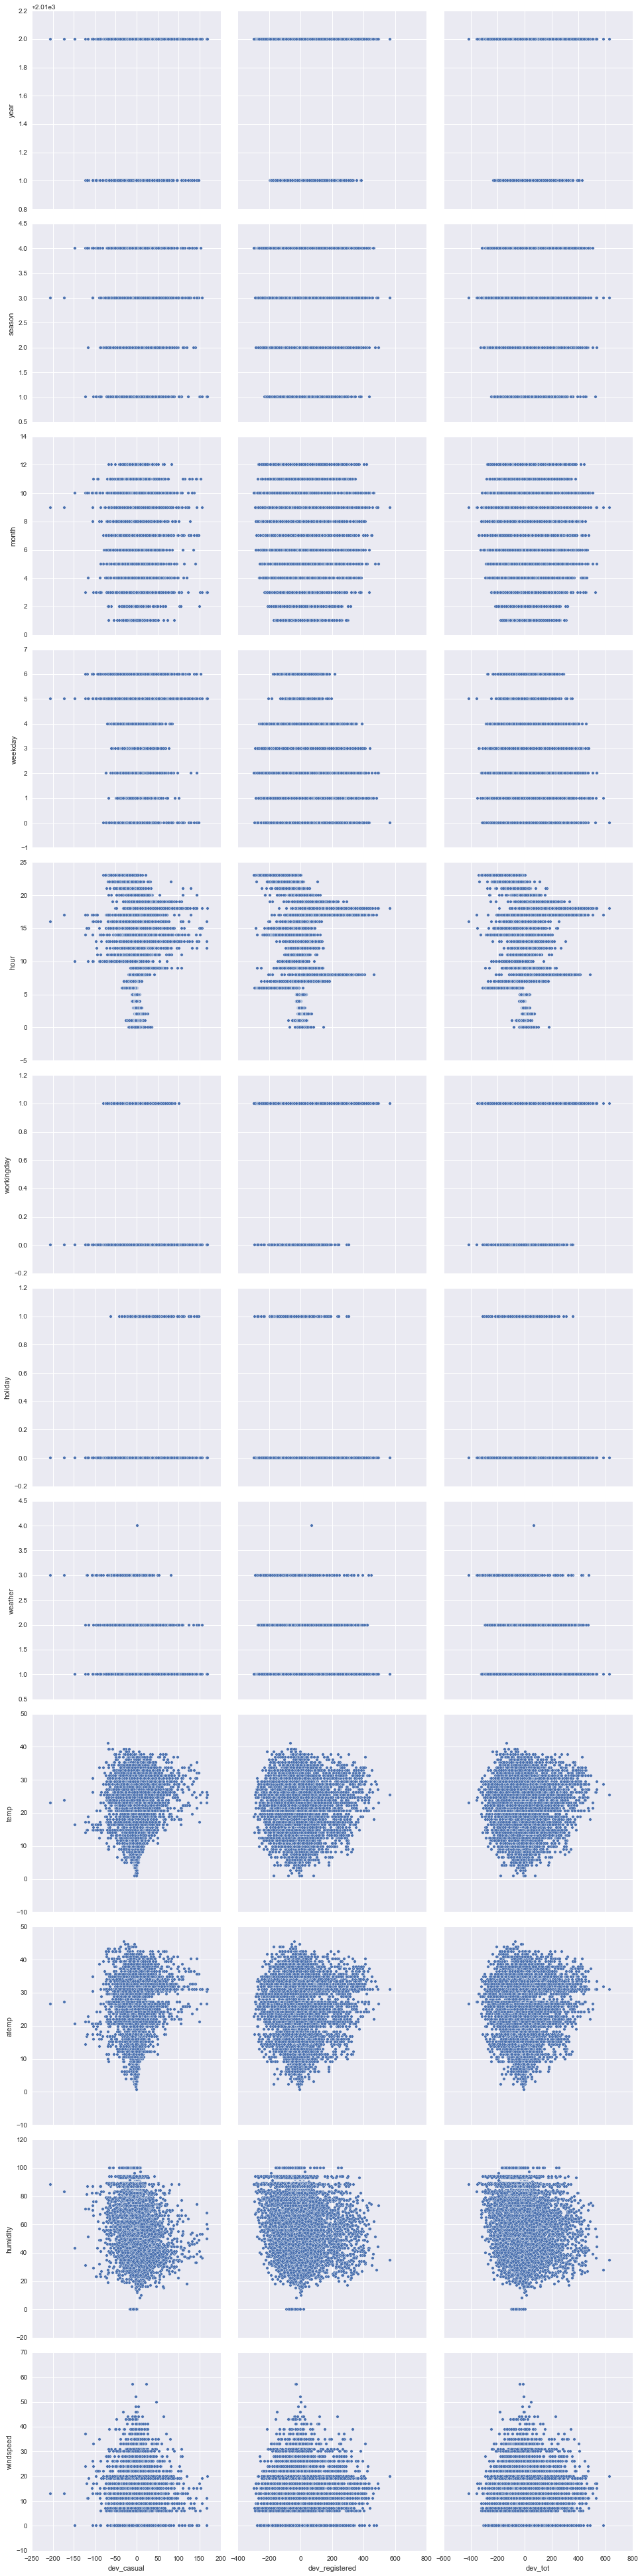

In [13]:
sns.pairplot(data_train[cat_var + num_var + dev_var],
             y_vars = cat_var + num_var, x_vars = dev_var ,
             #kind = 'reg',
             size = 4.5)
plt.show()

Next we do some jointplot to see the distributions feature data and customer data. We only do this for `hour` and `dev_tot` as an example.

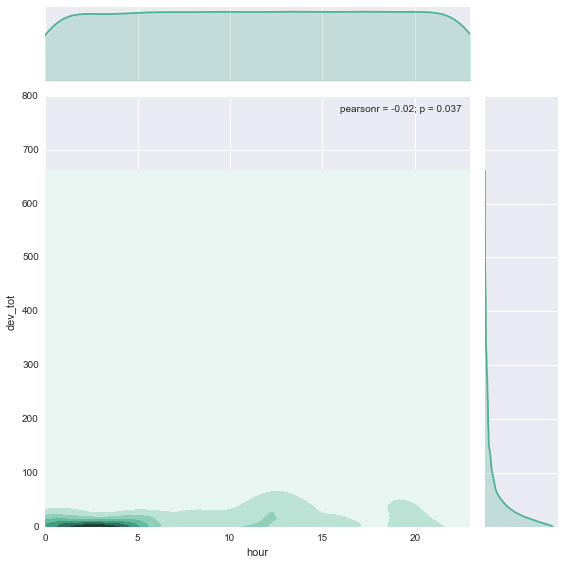

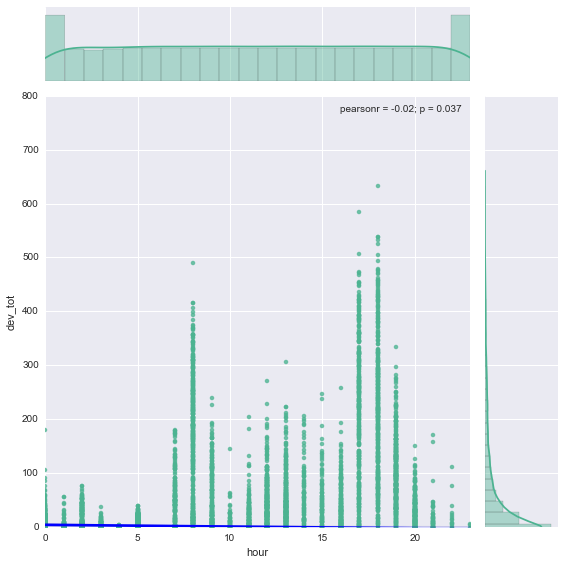

In [15]:
x = data_train.hour
y = data_train["dev_tot"]

display(
    sns.jointplot(x, y, kind="kde", color="#4CB391",size=8,xlim=[0,23], ylim=[0,800]))

sns.jointplot(x, y, kind="reg", color="#4CB391",size=8,xlim=[0,23], ylim=[0,800]
              ,joint_kws={'line_kws':{'color':'blue'}})

plt.show()

`temp` and `atemp` are linearly correlated

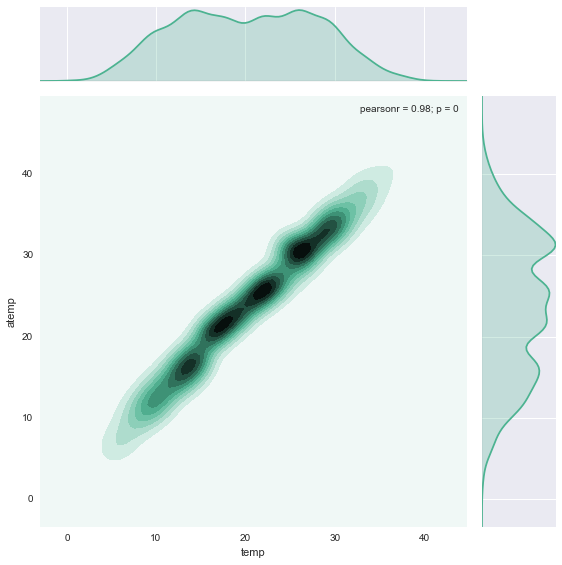

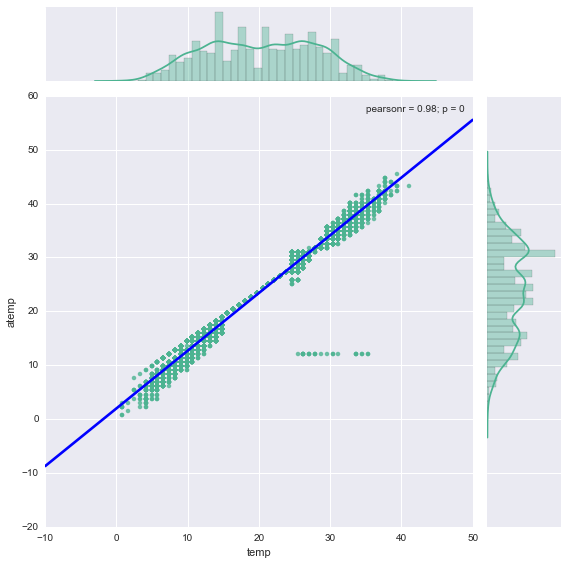

In [17]:
x = data_train.temp
y = data_train["atemp"]

display(sns.jointplot(x, y, kind="kde", color="#4CB391",size=8))
display(sns.jointplot(x, y, kind="reg", color="#4CB391",size=8
        ,joint_kws={'line_kws':{'color':'blue'}}))

Similar scenario holds for month and season

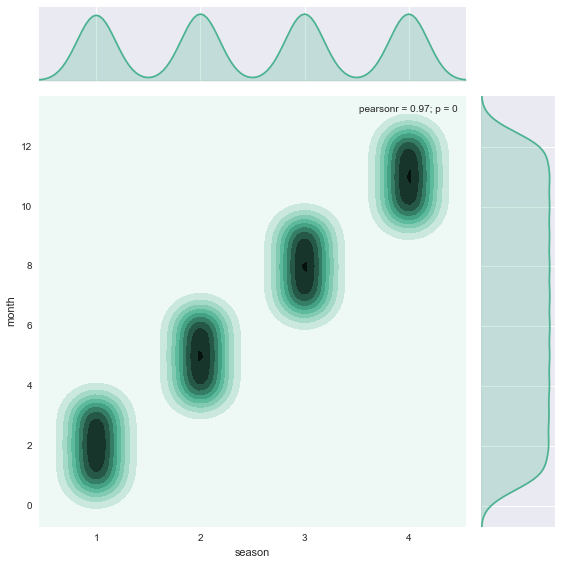

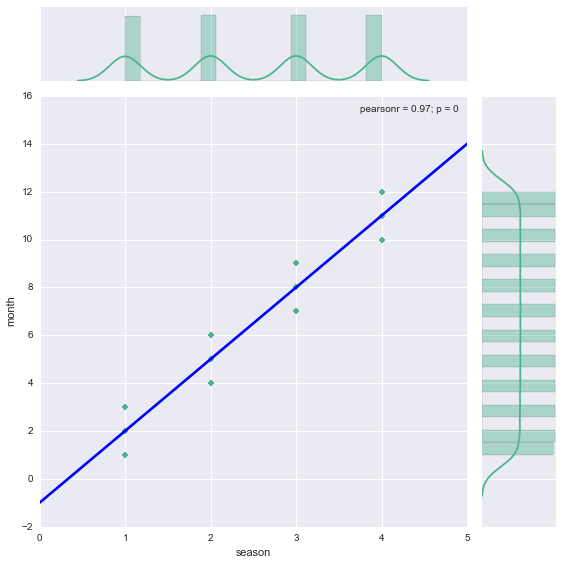

In [18]:
x = data_train.season
y = data_train["month"]

display(sns.jointplot(x, y, kind="kde", color="#4CB391",size=8))
display(sns.jointplot(x, y, kind="reg", color="#4CB391",size=8
        ,joint_kws={'line_kws':{'color':'blue'}}))